# Fitting nonlinear functions: polynomial regression and kernel ridge regression

## Fitting polynomials using least squares
Thus far in this course, we have used the term linear regression to mean "fitting a line to data". In this section, we will see that linear regression can actually be used as a general method to fit functions which are _nonlinear_ functions of the data. In particular, in this section, we will focus on the task of fitting polynomials to data.

To see how this is done, suppose we would like to fit a $p$th order polynomial of the form

$$
f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_p x^p \hspace{10mm} (1)
$$

to some observed data $(x, y)$. Then define the vectors 

$$
\boldsymbol{z}_p(x) = \begin{bmatrix} 1 \\ x \\ x^2 \\\vdots \\ x^p\end{bmatrix}\in\mathbb{R}^{p+1},\;\;\; \boldsymbol{\beta}=\begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\\vdots \\ \beta_p\end{bmatrix} \in \mathbb{R}^{p+1}
$$

and observe that the model $(1)$ can be equivalently expressed as

$$
f(x) = \boldsymbol{z}_p(x)\cdot \boldsymbol{\beta}.
$$

Given some data $(x_1,y_1),\dots,(x_n,y_n)$ that we'd like to fit this model, we could define the usual least squares objective as 

$$
\sum_{i=1}^n (y_i - \boldsymbol{z}_p(x_i)\cdot \boldsymbol{\beta})^2 = \|\boldsymbol{y} - \boldsymbol{X}_p \boldsymbol{\beta}\|_2^2
$$

where we've defined the matrix 

$$
\boldsymbol{X}_p = \begin{bmatrix}\boldsymbol{z}_p(x_1)\\ \vdots \\ \boldsymbol{z}_p(x_1)\end{bmatrix} = \begin{bmatrix} 1 & x_1 & x_1^2 & \cdots & x_1^p\\ \vdots & \vdots & \vdots &\vdots & \vdots \\ \vdots & \vdots & \vdots &\vdots & \vdots \\ 1 & x_n & x_n^2 & \cdots & x_n^p\end{bmatrix}
$$

Our problem now looks identical to our usual least squares problem, and we can get the usual solution: $\hat{\boldsymbol{\beta}} = (\boldsymbol{X}_p^\top \boldsymbol{X}_p)^{-1}\boldsymbol{X}_p^\top \boldsymbol{y}$. Indeed, in this model, each power $x^j$ just acts like an additional feature in our model. These coefficients can be plugged back in to get a fitted $p$th order polynomial:

$$
\hat{f}(x) = \hat{\beta}_0 + \hat{\beta}_1 x + \hat{\beta}_2 x^2 + \cdots + \hat{\beta}_p x^p.
$$

This is distinctly _not_ a linear function of the data. The important thing for making the usual least squares problem appear is that it is a linear function of the _parameters_ (i.e. the function $f_{\boldsymbol{\beta}}(x) = \boldsymbol{z}_p(x)\cdot \boldsymbol{\beta}$ is a linear function of $\boldsymbol{\beta}$). Let's see an example to illustrate how this works. First, let's generate some fake data coming from the "true" regression function $f_\star(x) = 4x + 3\cos(2\pi x)$, where $x$ is drawn uniformly at random from $[-1,1]$ and 

$$
y = f_\star(x) + \varepsilon.
$$

We do this in the following cell.

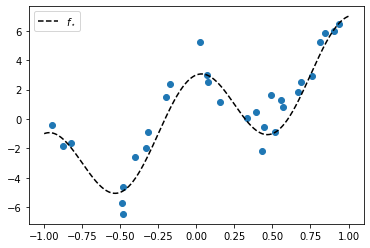

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f_star = lambda x: 4*x + 3*np.cos(2*np.pi*x)

n = 30
x = np.random.uniform(-1,1,size=n)
x_test = np.linspace(-1,1,1000)
y = f_star(x) + np.random.normal(size=n)

plt.scatter(x, y)
plt.plot(x_test, f_star(x_test), label=r"$f_\star$", color="black", linestyle="--")
plt.legend()
plt.show()

To generate the polynomial feature matrix $\boldsymbol{X}_p$, we define the following function.

In [2]:
def polynomial_features(x, p):
    x = x.reshape(-1,1)
    return np.hstack([x**j for j in range(p+1)])

Now let's try fitting a polynomial to our data.

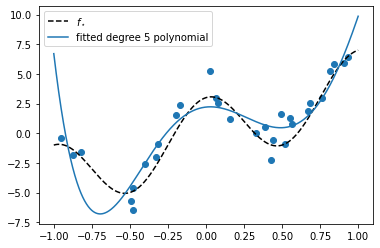

In [3]:
p = 5 # use an order 5 polynomial 
Xp = polynomial_features(x, p=p) # generate feature matrix
beta_hat = np.linalg.inv(Xp.T@Xp)@Xp.T@y # get OLS coefficients

# make predictions on test samples to compare the fitted function
Xp_test = polynomial_features(x_test, p=p)
y_hat_test = Xp_test@beta_hat

plt.scatter(x, y)
plt.plot(x_test, f_star(x_test), label=r"$f_\star$", color="black", linestyle="--")
plt.plot(x_test, y_hat_test, label="fitted degree 5 polynomial")
plt.legend()
plt.show()

As we can see, our fitted model does a pretty reasonable job of approximating the true regression function $f_\star$. Of course, in this example, we simply picked $p=5$ as the degree of the polynomial somewhat arbitrarily. Let's see what happens when we try different values.

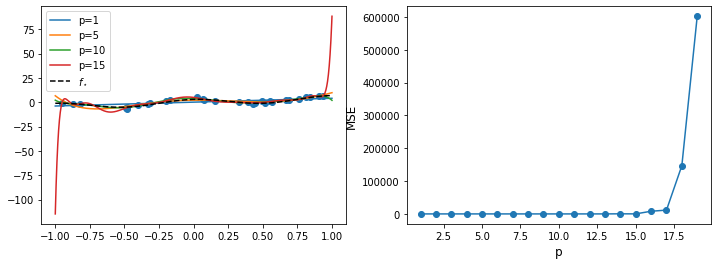

In [4]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
p_range = range(1,20,1) 

mses = []
for p in p_range:
    Xp = polynomial_features(x, p=p) # generate feature matrix
    beta_hat = np.linalg.inv(Xp.T@Xp)@Xp.T@y # get OLS coefficients

    # make predictions on test samples to compare the fitted function
    Xp_test = polynomial_features(x_test, p=p)
    y_hat_test = Xp_test@beta_hat
    mses.append(np.mean((y_hat_test - f_star(x_test))**2))
    if p in [1,5,10,15,20]:
        axs[0].plot(x_test, y_hat_test, label=f"p={p}")

axs[0].scatter(x, y)
axs[0].plot(x_test, f_star(x_test), label=r"$f_\star$", color="black", linestyle="--")
axs[0].legend()

axs[1].plot(p_range, mses, marker='o')
axs[1].set_xlabel("p", fontsize=12)
axs[1].set_ylabel("MSE", fontsize=12)
plt.show()

On the left plot, we see examples of fitted polynomials of different degrees. As you might expect, the models get more complicated as the degree $p$ gets larger. In the plot on the right, we plot the error (MSE) between the fitted values $\hat{f}_p(x)$ of the degree $p$ model against the true function values $f_\star(x)$. We see that the performance first gets better as we increase $p$, as the model becomes sufficiently expressive to fit the data, but that performance degrades for too large of $p$ as the models become too complex and overfit. For this example, the best value of $p$ appears to be $p=7$ or $p=8$. Of course, in practice we do not have access to $f_\star$, and so we couldn't use this method to pick $p$. Instead, we could use a method like cross validation to pick the best value. However, shortly we will see a different approach: we could choose $p$ to be very large, and then use _regularization_ to find a simpler model.

Let's consider the situation when $p$ is fixed to be an integer larger than $n$. In this case, the inverse $(\boldsymbol{X^\top X})^{-1}$ does not exist, and so we need to use something other than the standard least squares solution. A natural choice would be the Ridge regression solution, which is given by

$$
\hat{\boldsymbol{\beta}}_{RR}(\lambda) = (\boldsymbol{X}^\top \boldsymbol{X} + \lambda \boldsymbol{I})^{-1}\boldsymbol{X^\top y}.
$$

As we saw in the previous section, when we increase $\lambda$, we are forcing the parameter values to be smaller, which intuitively should result in a "simpler" model. In contrast, smaller $\lambda$ will result in a more complex model. In fact, in the limit as $\lambda \to 0$, we actually will get a familiar solution back:

$$
\lim_{\lambda\to 0}\hat{\boldsymbol{\beta}}_{RR}(\lambda) = \hat{\boldsymbol{\beta}}_{MP} = \boldsymbol{X}^\dagger\boldsymbol{y}
$$

where $\boldsymbol{X}^\dagger$ is the Moore-Penrose pseudo-inverse (discussed in a [previous section](../basic_linear_regression/more_least_squares.md)). Let's first try visualizing the Ridge solutions across a variety of values of $\lambda$. Here we will fix $p=50$ (which is bigger than $n=30$).

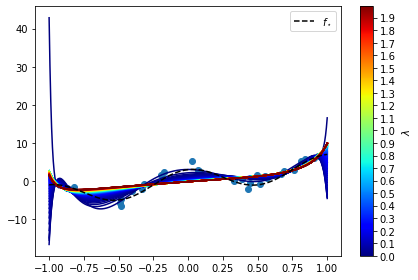

In [5]:
import matplotlib as mpl

lamb_range = np.arange(0.001, 2, 0.01) 

# get a colormap to represent the lambda values
c = np.arange(1, len(lamb_range) + 1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

p=50
mses = []
for ix, lamb in enumerate(lamb_range):
    Xp = polynomial_features(x, p=p) # generate feature matrix
    beta_hat = np.linalg.inv(Xp.T@Xp + lamb*np.eye(Xp.shape[1]))@Xp.T@y # get RR coefficients

    # make predictions on test samples to compare the fitted function
    Xp_test = polynomial_features(x_test, p=p)
    y_hat_test = Xp_test@beta_hat
    mses.append(np.mean((y_hat_test - f_star(x_test))**2))
    plt.plot(x_test, y_hat_test, c=cmap.to_rgba(ix + 1))

cbar = plt.colorbar(cmap, ticks=range(1,len(lamb_range)+1, 10), label="$\lambda$")
cbar.ax.set_yticklabels([round(l,2) for l in lamb_range[::10]])
plt.scatter(x, y)
plt.plot(x_test, f_star(x_test), label=r"$f_\star$", color="black", linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()

As we can see from this plot, the solutions indeed become "simpler" as $\lambda$ gets bigger. We can also plot the errors (MSEs) as a function of $\lambda$ to see which value is theoretically best.

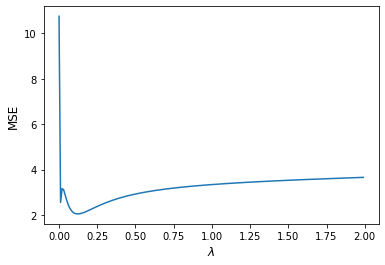

In [6]:
plt.plot(lamb_range, mses)
plt.xlabel("$\lambda$", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.show()

In turns out that the best MSE in this case actually occurs at the smallest $\lambda$ value, here $0.001$. What would happen though if we made $\lambda$ infinitesimally small? Would the solution get better? This limit is exactly what the MP solutions gives us, so let's plot the MP solution versus the $\hat{\boldsymbol{\beta}}_{RR}(\lambda = 0.001)$ solution to see how they compare.

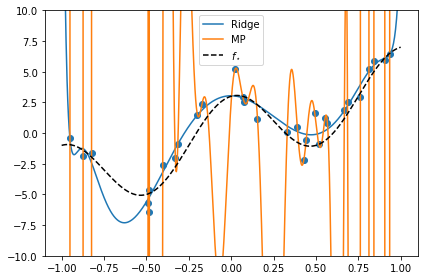

In [7]:
lamb = 0.001
Xp = polynomial_features(x, p=p) # generate feature matrix
beta_hat_RR = np.linalg.inv(Xp.T@Xp + lamb*np.eye(Xp.shape[1]))@Xp.T@y # get RR coefficients
beta_hat_MP = np.linalg.pinv(Xp)@y
# make predictions on test samples to compare the fitted function
Xp_test = polynomial_features(x_test, p=p)
y_hat_test_RR = Xp_test@beta_hat_RR
y_hat_test_MP = Xp_test@beta_hat_MP

plt.scatter(x, y)
plt.plot(x_test, y_hat_test_RR, label="Ridge")
plt.plot(x_test, y_hat_test_MP, label="MP")
plt.plot(x_test, f_star(x_test), label=r"$f_\star$", color="black", linestyle="--")
plt.ylim(-10,10)
plt.legend()
plt.tight_layout()
plt.show()

Amazingly, the MP solution performs completely different than the Ridge solution at $\lambda = 0.001$! It completely overfits the data, and does a very poor job of approximating the true regression function $f_\star$. We also observe another interesting point with the MP solution: it actually _perfectly_ predicts on each of the data points it was fit on. Indeed, it will always do this: when $p>n$, the Moore-Penrose pseudo-inverse is guaranteed to satisfy $\boldsymbol{X}\hat{\boldsymbol{\beta}}_{MP} = \boldsymbol{XX}^\dagger \boldsymbol{y} = \boldsymbol{y}$ (mathematically, this is because it will be a right inverse for the matrix $\boldsymbol{X}$).

## Kernel ridge regression